In [19]:
from pathlib import Path

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
def load_pokemon(filepath: Path) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    df = pd.concat([
        df,
        pd.get_dummies(df["Type 1"]),
        pd.get_dummies(df["Type 2"])
    ], axis=1)
    df.drop(["#"], axis=1, inplace=True)
    df["Legendary"] = df["Legendary"].astype(int)
    return df


In [29]:
df = load_pokemon(Path("data/Pokemon.csv"))
names = df.Name.tolist()
type1 = df["Type 1"]
type2 = df["Type 2"]
types = df[["Type 1", "Type 2"]]
df.drop(["Type 1", "Type 2"], axis=1, inplace=True)
features = df.drop("Name", axis=1).values.astype(np.float32)

In [35]:
marker_maps = {
    t: m
    for m, t in zip(list(".,ov^<>12348spP*hH"), type1.unique())
}

In [40]:
color_maps = {
    'Bug': "limegreen",
    'Dark': "black",
    'Dragon': "crimson",
    'Electric': "gold",
    'Fairy': "hotpink",
    'Fighting': "darkred",
    'Fire': "red",
    'Flying': "skyblue",
    'Ghost': "midnightblue",
    'Grass': "forestgreen",
    'Ground': "lightcoral",
    'Ice': "mintcream",
    'Normal': "lightpink",
    'Poison': "indigo",
    'Psychic': "mediumpurple",
    'Rock': "maroon",
    'Steel': "lightgray",
    'Water': "aqua"
}

In [36]:
type_markers = type2.map(marker_maps).fillna("+")
type_colors = type1.map(color_maps)

In [44]:
def min_max_scaler(x: np.ndarray) -> np.ndarray:
    x_min = x.min(axis=0, keepdims=True)
    x_max = x.max(axis=0, keepdims=True)
    return (x - x_min) / (x_max - x_min)

features = min_max_scaler(features)

In [45]:
X = TSNE(n_components=2).fit_transform(features)
X.shape

/Users/wararaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/wararaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(800, 2)

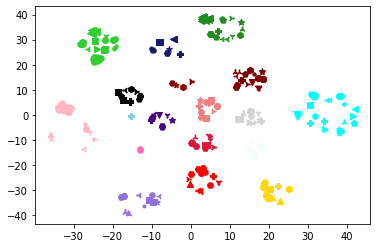

In [46]:
fig, ax = plt.subplots()
x = X[:, 0]
y = X[:, 1]

for ct, cv in color_maps.items():
    for mt, mv in marker_maps.items():
        tmp = types[(types["Type 1"]==ct)&(types["Type 2"]==mt)]
        if len(tmp) == 0:
            continue
        ax.scatter(x[tmp.index], y[tmp.index], c=cv, marker=mv)

plt.show()